In [23]:
#STUDENT SCORE PREDICTION 

import pandas as pd #import pandas library 

dataframe=pd.read_csv('Exam_Score_Prediction.csv')
dataframe.head()
dataframe.info()
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


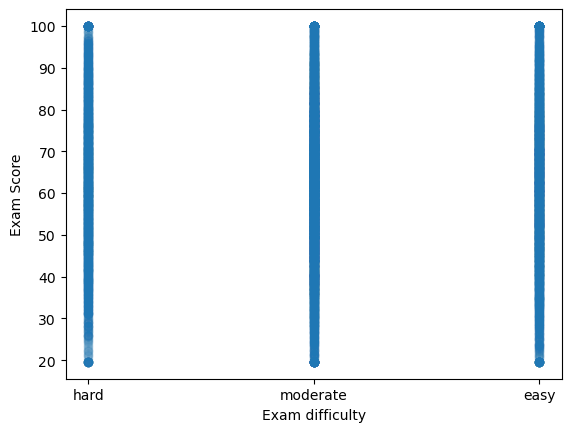

In [24]:
plt.scatter(dataframe["exam_difficulty"],dataframe['exam_score'],alpha=0.05)
plt.xlabel("Exam difficulty")
plt.ylabel("Exam Score")
plt.show()

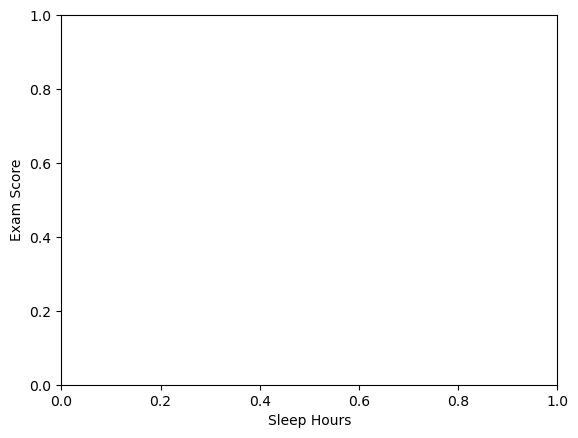

In [25]:
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()

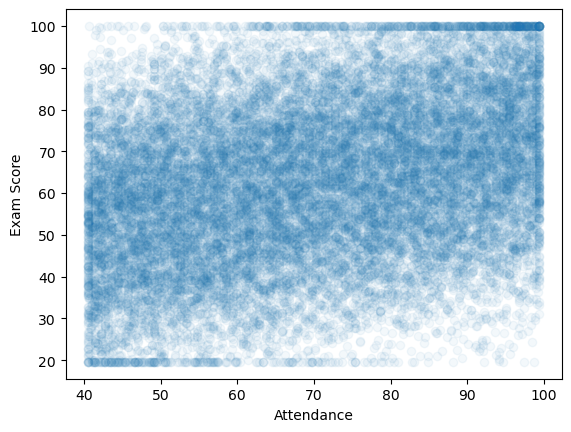

In [26]:
plt.scatter(dataframe["class_attendance"],dataframe['exam_score'],alpha=0.05)
plt.xlabel("Attendance")
plt.ylabel("Exam Score")
plt.show()

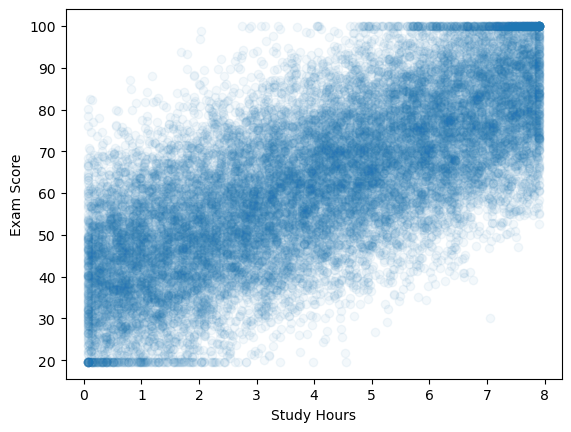

In [27]:
import matplotlib.pyplot as plt

plt.scatter(dataframe["study_hours"],dataframe["exam_score"],alpha=0.05)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [31]:
correlation1=dataframe["sleep_hours"].corr(dataframe["exam_score"])
print(correlation1)
correlation2=dataframe["class_attendance"].corr(dataframe["exam_score"])
print(correlation2)
correlation3=dataframe["study_hours"].corr(dataframe["exam_score"])
print(correlation3)

0.13322174783646307
0.30885027005564647
0.717787993907973


In [37]:
ids=dataframe("student_id")
dataframe=dataframe.drop(columns["student_id"])

TypeError: 'DataFrame' object is not callable

In [38]:
X = dataframe.drop(columns=["exam_score"])
y = dataframe["exam_score"]


In [39]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np

val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print("Validation RMSE:", rmse)


Validation RMSE: 9.772517380338872


In [44]:
model.fit(X_encoded, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
final_preds = model.predict(X_encoded)


In [46]:
#training random forest to reduce rmse 
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42, n_jobs=-1)
random_forest.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
#evaluating rmse
random_forest_preds=random_forest.predict(X_val)
random_forest_rmse=np.sqrt(mean_squared_error(y_val,random_forest_preds))
print("Random forest RMSE:" ,random_forest_rmse)

Random forest RMSE: 10.552364865606357


In [50]:
#checking overfitting and computing training rmse 
train_preds=random_forest.predict(X_train)
train_rmse=np.sqrt(mean_squared_error(y_train,train_preds))
print("Train RMSE:",train_rmse)
print("Validation RMSE:",random_forest_rmse)

Train RMSE: 4.67242716563391
Validation RMSE: 10.552364865606357


In [53]:
#important feature checking
important_feature=pd.Series(random_forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
important_feature.head(10)

study_hours                   0.585290
class_attendance              0.159173
sleep_hours                   0.065216
age                           0.025185
sleep_quality_poor            0.023192
facility_rating_low           0.022655
sleep_quality_good            0.019560
study_method_self-study       0.010923
study_method_online videos    0.009316
facility_rating_medium        0.007718
dtype: float64

In [54]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 1. Feature Engineering
dataframe['effort'] = dataframe['study_hours'] * dataframe['class_attendance']
dataframe['sleep_dist'] = (dataframe['sleep_hours'] - 7.5).abs()
dataframe['study_sq'] = dataframe['study_hours'] ** 2

# 2. Target Encoding (Simple Version)
for col in ['course', 'study_method']:
    mapping = dataframe.groupby(col)['exam_score'].mean()
    dataframe[f'{col}_te'] = dataframe[col].map(mapping)

# 3. Scale and Train
# Linear models REQUIRE scaling to perform well
scaler = StandardScaler()
X = dataframe[['study_hours', 'class_attendance', 'sleep_hours', 'effort', 'sleep_dist', 'study_sq', 'course_te']]
X_scaled = scaler.fit_transform(X)

model = Ridge(alpha=1.0) # Alpha helps prevent overfitting
model.fit(X_scaled, dataframe['exam_score'])

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [1]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

target = 'exam_score'
X = df.drop(columns=[target])
y = df[target]

# Convert categorical
cat_cols = X.select_dtypes(include='object').columns
X[cat_cols] = X[cat_cols].astype('category')

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=800,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    tree_method='hist',
    enable_categorical=True,
    random_state=42
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=100
)

preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, preds))
print("Validation RMSE:", rmse)


NameError: name 'df' is not defined